# ***section 2***

In [0]:
image = cv2.imread("test_image1.jpg",0)
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations)
print(hist)
np.savetxt('HOGfeatures.txt', hist)

# ***section 3***

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from skimage import data, color , transform

faces = fetch_lfw_people()
positive_patches = faces.images


imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]


from sklearn.feature_extraction.image import PatchExtractor
def extraxt_patches(img,N,scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N,random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch,patch_size)for patch in patches])
    return patches

  
negative_patches = np.vstack([extraxt_patches(im,1000,scale)for im in images for scale in [0.5,1.0,2.0]])

In [2]:
from google.colab.patches import cv2_imshow
import cv2
print(positive_patches.shape)
print(negative_patches.shape)

(13233, 62, 47)
(30000, 62, 47)


# **section 4**

In [3]:
from itertools import chain
from skimage import feature
X1= np.array([im for im in chain(positive_patches,negative_patches)])
X = np.array([feature.hog(im)for im in X1])
Y = np.array([1
                    for im in positive_patches])
Y1 = np.array([0
                    for im in negative_patches])

y = np.concatenate((Y,Y1),axis = 0)  
X.shape

(43233, 1215)

In [0]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# ***section 5***

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV




X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

svclassifier = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
svclassifier.fit(X_train, y_train)
y_pred_svm_linear_test = svclassifier.predict(X_test)
y_pred_svm_linear_train = svclassifier.predict(X_train)


# svclassifier = SVC(kernel='poly')
# svclassifier.fit(X_train1, y_train)
# y_pred_svm_poly_test = svclassifier.predict(X_test1)
# y_pred_svm_poly_train = svclassifier.predict(X_train1)


svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)
y_pred_svm_rbf_test = svclassifier1.predict(X_test)
y_pred_svm_rbf_train = svclassifier1.predict(X_train)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [261]:
print(svclassifier.best_params_)

{'C': 2.0}


In [260]:

from sklearn.metrics import *
import sklearn.metrics as metrics

print("linear : Trainig data Accuracy:",metrics.accuracy_score(y_train, y_pred_svm_linear_train))
print("linear : Testing data Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_linear_test))

print("rbf :Training data Accuracy:",metrics.accuracy_score(y_train, y_pred_svm_rbf_train))
print("rbf : Testing data Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_rbf_test))

# print("poly : Testing data Accuracy:",metrics.accuracy_score(y_train, y_pred_svm_poly_train))
# print("poly : Testing data Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_poly_test))

linear : Trainig data Accuracy: 0.9973399641473428
linear : Testing data Accuracy: 0.9932924713773563
rbf :Training data Accuracy: 0.9992771641704736
rbf : Testing data Accuracy: 0.9973401179599861


## ***section 6***

# ***Reading Test Images***

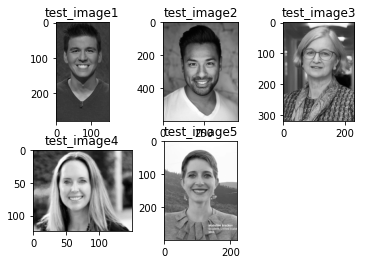

In [244]:
import cv2
import skimage

test_image1 = cv2.imread('test_image1.jpg',0)
test_image1 = transform.rescale(test_image1, 0.5)
test_image1 = test_image1[20:300, 80:230]

test_image2 = cv2.imread('test_image2.jpg',0)
test_image2 = transform.rescale(test_image2, 0.5)
test_image2 = test_image2[1:600, 1:460]


test_image3 = cv2.imread('test_image3.jpg',0)
test_image3 = transform.rescale(test_image3, 0.5)
test_image3 = test_image3[1:400, 100:330]


test_image4 = cv2.imread('test_image4.png',0)
test_image4 = transform.rescale(test_image4, 0.5)
# test_image4 = test_image4[1:400, 100:330]
test_image5 = cv2.imread('test_image5.jpg',0)
test_image5 = transform.rescale(test_image5, 0.5)
test_image5 = test_image5[1:300, 50:270]


test_image11 = cv2.imread('test_image1.jpg')
test_image11 = transform.rescale(test_image11, 0.5)
test_image11 = test_image11[20:300, 80:230]

test_image22 = cv2.imread('test_image2.jpg')
test_image22 = transform.rescale(test_image22, 0.5)
test_image22 = test_image22[1:600, 1:460]


test_image33 = cv2.imread('test_image3.jpg')
test_image33 = transform.rescale(test_image33, 0.5)
test_image33 = test_image33[1:400, 100:330]


test_image44 = cv2.imread('test_image4.png')
test_image44 = transform.rescale(test_image44, 0.5)
# test_image4 = test_image4[1:400, 100:330]
test_image55 = cv2.imread('test_image5.jpg')
test_image55 = transform.rescale(test_image55, 0.5)
test_image55 = test_image55[1:300, 50:270]



fig, axes = plt.subplots(nrows=2, ncols=3)

ax = axes.ravel()

ax[0].imshow(test_image1, cmap='gray')
ax[0].set_title("test_image1")

ax[1].imshow(test_image2, cmap='gray')
ax[1].set_title("test_image2")

ax[2].imshow(test_image3, cmap='gray')
ax[2].set_title("test_image3")

ax[3].imshow(test_image4, cmap='gray')
ax[3].set_title("test_image4")

ax[4].imshow(test_image5, cmap='gray')
ax[4].set_title("test_image5")
# ax[0].set_xlim(0, 512)
# ax[0].set_ylim(512, 0)
# plt.tight_layout()
plt.axis('off');
plt.show()

In [266]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian

image = cv2.imread('test_image1.jpg',0)
image = transform.rescale(image, 0.5)
image = image[20:300, 80:230]

rows, cols, dim = image.shape
pyramid = np.asarray(tuple(pyramid_gaussian(image)))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()



layer = image
gaussian_pyramid = [layer]
for i in range(7):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)
aa = np.array(gaussian_pyramid)
test11_hog = np.array([feature.hog(patch) for patch in aa])



ValueError: ignored

# ***Extraxting Hog Feature For Test Image Pyramids***

In [268]:
def pyramid_fun(img):
    for i in range(0, img.shape[0] - 62, 16):
        for j in range(0, img.shape[1] - 47, 16):
            # extracting window
            patch = img[i:i + 62, j:j + 47]
            yield (i, j), patch





i1, p1 = zip(*pyramid_fun(test_image1))
i2, p2 = zip(*pyramid_fun(test_image2))
i3, p3 = zip(*pyramid_fun(test_image3))
i4, p4 = zip(*pyramid_fun(test_image4))
i5, p5 = zip(*pyramid_fun(test_image5))



test1_hog = np.array([feature.hog(patch) for patch in p1])
test2_hog = np.array([feature.hog(patch) for patch in p2])
test3_hog = np.array([feature.hog(patch) for patch in p3])
test4_hog = np.array([feature.hog(patch) for patch in p4])
test5_hog = np.array([feature.hog(patch) for patch in p5])

# check it out
print(test1_hog.shape)
print(test2_hog.shape)
print(test3_hog.shape)
print(test4_hog.shape)
print(test5_hog.shape)



(98, 1215)
(884, 1215)
(204, 1215)
(28, 1215)
(165, 1215)


# ***‫‪Non.Maximum.Suppression‬‬***

In [0]:
# https://github.com/bruceyang2012/nms_python


def non_max_suppression_slow(boxes, overlapThresh=.3):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list, add the index
        # value to the list of picked indexes, then initialize
        # the suppression list (i.e. indexes that will be deleted)
        # using the last index
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        suppress = [last]

        # loop over all indexes in the indexes list
        for pos in range(0, last):
            # grab the current index
            j = idxs[pos]

            # find the largest (x, y) coordinates for the start of
            # the bounding box and the smallest (x, y) coordinates
            # for the end of the bounding box
            xx1 = max(x1[i], x1[j])
            yy1 = max(y1[i], y1[j])
            xx2 = min(x2[i], x2[j])
            yy2 = min(y2[i], y2[j])

            # compute the width and height of the bounding box
            w = max(0, xx2 - xx1 + 1)
            h = max(0, yy2 - yy1 + 1)

            # compute the ratio of overlap between the computed
            # bounding box and the bounding box in the area list
            overlap = float(w * h) / area[j]

            # if there is sufficient overlap, suppress the
            # current bounding box
            if overlap > overlapThresh:
                suppress.append(pos)

        # delete all indexes from the index list that are in the
        # suppression list
        idxs = np.delete(idxs, suppress)

    # return only the bounding boxes that were picked
    return boxes[pick]

def non_max_suppression_fast(boxes, probs=None, overlapThresh=0.3):
    
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []

    # if the bounding boxes are integers, convert them to floats -- this
    # is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # compute the area of the bounding boxes and grab the indexes to sort
    # (in the case that no probabilities are provided, simply sort on the
    # bottom-left y-coordinate)
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = y2

    # if probabilities are provided, sort on them instead
    if probs is not None:
        idxs = probs

    # sort the indexes
    idxs = np.argsort(idxs)

    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the index value
        # to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of the bounding
        # box and the smallest (x, y) coordinates for the end of the bounding
        # box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked
    return boxes[pick].astype("int")

# ***Test1 Output***

32 48
32 64
48 208


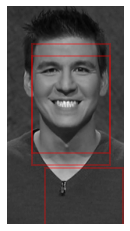

In [269]:
out1 = svclassifier.predict(test1_hog)



fig, ax = plt.subplots()
ax.imshow(test_image1, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(i1)
t=[]

for i, j in indices[out1 == 1]:
    
    ax.add_patch(plt.Rectangle((j, i), 100, 140, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    print(j,i)
    t.append((j,i,j+100,i+140))
tt = np.array(t)


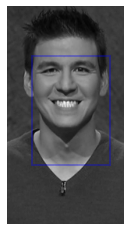

In [270]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import time
pick = non_max_suppression_fast(tt, probs=None,overlapThresh=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image1, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices4)
ax.add_patch(plt.Rectangle((pick[1][0], pick[1][1]), 100, 140, edgecolor='blue',
                               alpha=0.3, lw=2, facecolor='none'))


# ***Test2 Output***

192 64
96 96
128 224
64 336
144 416
256 496


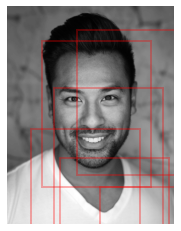

In [271]:
out2 = svclassifier.predict(test2_hog)


fig, ax = plt.subplots()
ax.imshow(test_image2, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(i2)
t=[]

for i, j in indices[out2 == 1]:
    ax.add_patch(plt.Rectangle((j, i), 300, 400, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    print(j,i)
    t.append((j,i,j+300,i+400))
tt = np.array(t)


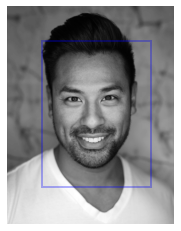

In [249]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import time
 
# construct a list containing the images that will be examined
# along with their respective bounding boxes
images = [
    (test_image44, np.array([
    (192, 64, 192+300, 64+400),
    (96, 96, 96+300, 96+400),
    (128, 224, 128+300, 224+400),
    (64, 336, 64+300, 336+400),
    (144, 416, 144+400, 416+400),
    (256,496,256+300,496+300)]))]
    
iter_num= 1
images = images*iter_num  # change the iterations to compare the two nms method

t1 = time.time()
    
# loop over the images
for (i, (imagePath, boundingBoxes)) in enumerate(images):
    # load the image and clone it
    # print ("[x] %d initial bounding boxes" % (len(boundingBoxes)))
    image = test_image33
    orig = test_image33
     
    pick = non_max_suppression_fast(boundingBoxes, probs=None,overlapThresh=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image2, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices4)
ax.add_patch(plt.Rectangle((pick[1][0], pick[1][1]), 300, 400, edgecolor='blue',
                               alpha=0.3, lw=2, facecolor='none'))


# ***Test3 Output***

160 32
64 64
112 64
64 96
80 128


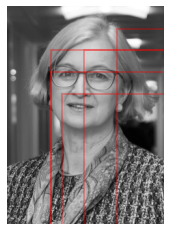

In [272]:
out3 = svclassifier.predict(test3_hog)


fig, ax = plt.subplots()
ax.imshow(test_image3, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(i3)
t=[]

for i, j in indices[out3 == 1]:
    
    ax.add_patch(plt.Rectangle((j, i), 300, 400, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    print(j,i)
    t.append((j,i,j+300,i+400))
tt = np.array(t)


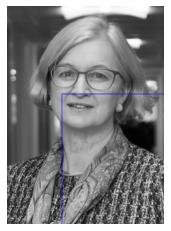

In [274]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import time
pick = non_max_suppression_fast(tt, probs=None,overlapThresh=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image3, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices4)
ax.add_patch(plt.Rectangle((pick[0][0], pick[0][1]), 300, 400, edgecolor='blue',
                               alpha=0.3, lw=2, facecolor='none'))
# pick

# ***Test4 Output***

32 32
48 32


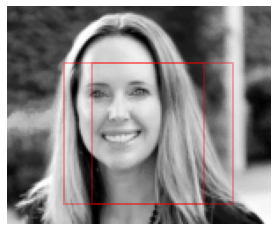

In [275]:
out4 = svclassifier.predict(test4_hog)


fig, ax = plt.subplots()
ax.imshow(test_image4, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(i4)
t=[]

for i, j in indices[out4 == 1]:
    ax.add_patch(plt.Rectangle((j, i), 80, 80, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    print(j,i)
    t.append((j,i,j+300,i+400))
tt = np.array(t)

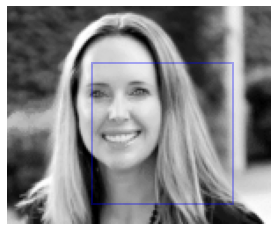

In [276]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import time
pick = non_max_suppression_fast(tt, probs=None,overlapThresh=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image4, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices4)
ax.add_patch(plt.Rectangle((pick[0][0], pick[0][1]), 80, 80, edgecolor='blue',
                               alpha=0.3, lw=2, facecolor='none'))


# ***Test5 Output***

64 64
48 80
80 128
144 144
160 176
112 224


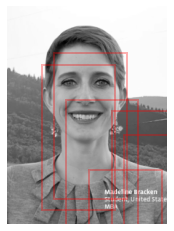

In [277]:
out5 = svclassifier.predict(test5_hog)


fig, ax = plt.subplots()
ax.imshow(test_image5, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(i5)
t=[]
for i, j in indices[out5 == 1]:
    ax.add_patch(plt.Rectangle((j, i), 100, 200, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    print(j,i)
    t.append((j,i,j+100,i+200))
tt = np.array(t)    

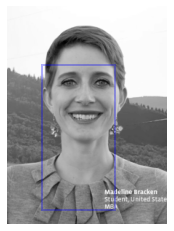

In [278]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import time
 
pick = non_max_suppression_fast(tt, probs=None,overlapThresh=0.3)

fig, ax = plt.subplots()
ax.imshow(test_image5, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices4)
ax.add_patch(plt.Rectangle((pick[1][0], pick[1][1]), 100, 200, edgecolor='blue',
                               alpha=0.3, lw=2, facecolor='none'))
